**Data Cleaning**

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import pickle
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [26]:
df=pd.read_excel("value_wise.xlsx")

In [27]:
df['Item'] = pd.to_datetime(df['Item'], format='%Y')
df['Item']=df['Item'].dt.year
df.set_index('Item', inplace=True)

In [28]:
df.columns

Index(['Frozen_Fish', 'Dried_Item', 'Live_Item', 'Chilled_Item', 'Others',
       'Frozen_Shrimp', 'Frozen_Cuttle_Fish', 'Frozen_Squid'],
      dtype='object')

In [29]:
def plot_series(historical_data, forecast_data):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 4, 1)
    plt.plot(historical_data.index, historical_data['Frozen_Fish_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Frozen_Fish_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Frozen Fish')

    plt.subplot(2, 4, 2)
    plt.plot(historical_data.index, historical_data['Dried_Item_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Dried_Item_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Dried Item')

    plt.subplot(2, 4, 3)
    plt.plot(historical_data.index, historical_data['Live_Item_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Live_Item_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Live Item')

    plt.subplot(2, 4, 4)
    plt.plot(historical_data.index, historical_data['Chilled_Item_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Chilled_Item_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Chilled Item')

    plt.subplot(2, 4, 5)
    plt.plot(historical_data.index, historical_data['Others_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Others_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Others')

    plt.subplot(2, 4, 6)
    plt.plot(historical_data.index, historical_data['Frozen_Shrimp_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Frozen_Shrimp_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Frozen_Shrimp')

    plt.subplot(2, 4, 7)
    plt.plot(historical_data.index, historical_data['Frozen_Cuttle_Fish_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Frozen_Cuttle_Fish_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Frozen_Cuttle_Fish')

    plt.subplot(2, 4, 8)
    plt.plot(historical_data.index, historical_data['Frozen_Squid_Inv'], label='Historical ', color='blue')
    plt.plot(forecast_data.index, forecast_data['Frozen_Squid_Inv'], label='Forecast ', linestyle='--', color='red')
    plt.title('Frozen_Squid')

    plt.tight_layout()
    plt.show()


In [30]:
df['Frozen_Fish_Inv']=1/df['Frozen_Fish']
df['Dried_Item_Inv']=1/df['Dried_Item']
df['Live_Item_Inv']=1/df['Live_Item']
df['Chilled_Item_Inv']=1/df['Chilled_Item']
df['Others_Inv']=1/df['Others']
df['Frozen_Shrimp_Inv']=1/df['Frozen_Shrimp']
df['Frozen_Cuttle_Fish_Inv']=1/df['Frozen_Cuttle_Fish']
df['Frozen_Squid_Inv']=1/df['Frozen_Squid']

**Determining stationarity of Data**

In [31]:
def stationary_test(dataframe,column):
  print("For the column {}".format(column))
  adftest=adfuller(dataframe[column],autolag=None)
  stats=pd.Series(adftest[1],index=['p-value'])
  print(stats)
  dataframe.dropna(inplace=True)

In [32]:
stationary_test(df,'Frozen_Fish_Inv')
stationary_test(df,'Dried_Item_Inv')
stationary_test(df,'Live_Item_Inv')
stationary_test(df,'Chilled_Item_Inv')
stationary_test(df,'Others_Inv')
stationary_test(df,'Frozen_Shrimp_Inv')
stationary_test(df,'Frozen_Cuttle_Fish_Inv')
stationary_test(df,'Frozen_Squid_Inv')

For the column Frozen_Fish_Inv
p-value    0.057062
dtype: float64
For the column Dried_Item_Inv
p-value    0.01934
dtype: float64
For the column Live_Item_Inv
p-value    0.029118
dtype: float64
For the column Chilled_Item_Inv
p-value    0.000174
dtype: float64
For the column Others_Inv
p-value    0.000046
dtype: float64
For the column Frozen_Shrimp_Inv
p-value    0.905602
dtype: float64
For the column Frozen_Cuttle_Fish_Inv
p-value    0.070079
dtype: float64
For the column Frozen_Squid_Inv
p-value    0.498664
dtype: float64


**Dividing Data into Training and Testing**

In [33]:
df.columns

Index(['Frozen_Fish', 'Dried_Item', 'Live_Item', 'Chilled_Item', 'Others',
       'Frozen_Shrimp', 'Frozen_Cuttle_Fish', 'Frozen_Squid',
       'Frozen_Fish_Inv', 'Dried_Item_Inv', 'Live_Item_Inv',
       'Chilled_Item_Inv', 'Others_Inv', 'Frozen_Shrimp_Inv',
       'Frozen_Cuttle_Fish_Inv', 'Frozen_Squid_Inv'],
      dtype='object')

In [34]:
train=df[['Frozen_Fish_Inv', 'Dried_Item_Inv', 'Live_Item_Inv',
       'Chilled_Item_Inv', 'Others_Inv', 'Frozen_Shrimp_Inv',
       'Frozen_Cuttle_Fish_Inv', 'Frozen_Squid_Inv']].iloc[0:27]

test=df[['Frozen_Fish_Inv', 'Dried_Item_Inv', 'Live_Item_Inv',
       'Chilled_Item_Inv', 'Others_Inv', 'Frozen_Shrimp_Inv',
       'Frozen_Cuttle_Fish_Inv', 'Frozen_Squid_Inv']].iloc[27:]
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)
lag_order=1
model = VAR(train_scaled)
results=model.fit(maxlags=lag_order,method='ols')
forecast_scaled = results.forecast(train_scaled.values[-lag_order:], steps=len(test))
forecast = scaler.inverse_transform(forecast_scaled)
forecast_data = pd.DataFrame(forecast, index=test.index, columns=train.columns)
test=1/test
forecast_data=1/forecast_data
from sklearn.metrics import mean_squared_error
print("Total RMSE {}".format(np.sqrt(mean_squared_error(test,forecast_data))))
print("Frozen Fish RMSE:", np.sqrt(mean_squared_error(test['Frozen_Fish_Inv'], forecast_data['Frozen_Fish_Inv'])))
print("Dried Item RMSE:", np.sqrt(mean_squared_error(test['Dried_Item_Inv'], forecast_data['Dried_Item_Inv'])))
print("Live Item RMSE:", np.sqrt(mean_squared_error(test['Live_Item_Inv'], forecast_data['Live_Item_Inv'])))
print("Chilled Item RMSE:", np.sqrt(mean_squared_error(test['Chilled_Item_Inv'], forecast_data['Chilled_Item_Inv'])))
print("Others RMSE:", np.sqrt(mean_squared_error(test['Others_Inv'], forecast_data['Others_Inv'])))
print(results.summary())


Total RMSE 3341.6389786158015
Frozen Fish RMSE: 1381.2639642018944
Dried Item RMSE: 1104.8055861695782
Live Item RMSE: 91.85333126132443
Chilled Item RMSE: 162.69277875394752
Others RMSE: 568.9300916689974
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 22, Jan, 2025
Time:                     13:44:25
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -28.5726
Nobs:                     26.0000    HQIC:                  -31.0533
Log likelihood:           193.595    FPE:                1.51937e-14
AIC:                     -32.0565    Det(Omega_mle):     1.40898e-15
--------------------------------------------------------------------
Results for equation Frozen_Fish_Inv
                               coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


**Using the Entire Data for Training and Testing**

Total RMSE 12658.522032677223
Frozen Fish RMSE: 2457.5990271286523
Dried Item RMSE: 1269.1301505003319
Live Item RMSE: 225.60436072750235
Chilled Item RMSE: 476.3139780511904
Others RMSE: 2460.1157546290915


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


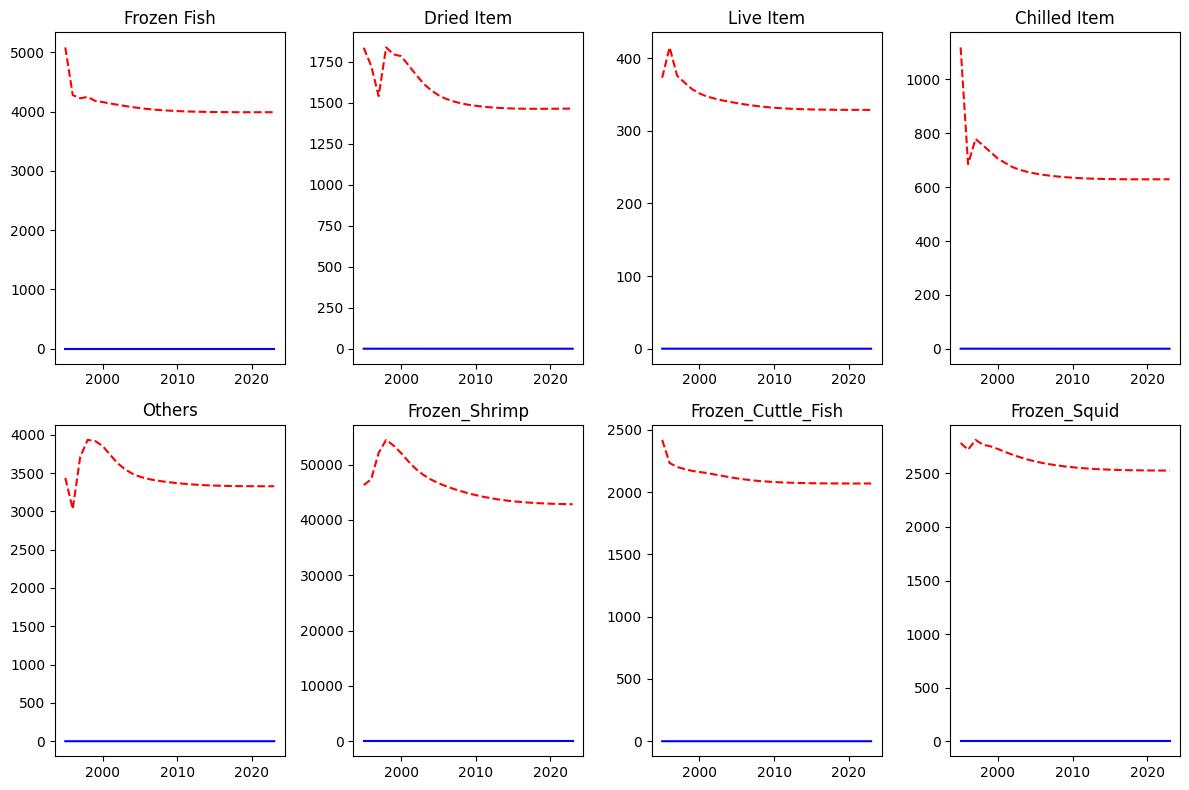

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 22, Jan, 2025
Time:                     13:44:26
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                   -29.2861
Nobs:                     28.0000    HQIC:                  -31.6645
Log likelihood:           212.122    FPE:                7.50812e-15
AIC:                     -32.7118    Det(Omega_mle):     8.07573e-16
--------------------------------------------------------------------
Results for equation Frozen_Fish_Inv
                               coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------
const                            -0.128568         0.054074           -2.378           0.017
L1.Frozen_Fish_Inv                0.129857         0.192529            0.674           0.500
L1

In [35]:
train=df[['Frozen_Fish_Inv', 'Dried_Item_Inv', 'Live_Item_Inv',
       'Chilled_Item_Inv', 'Others_Inv', 'Frozen_Shrimp_Inv',
       'Frozen_Cuttle_Fish_Inv', 'Frozen_Squid_Inv']]

test=df[['Frozen_Fish_Inv', 'Dried_Item_Inv', 'Live_Item_Inv',
       'Chilled_Item_Inv', 'Others_Inv', 'Frozen_Shrimp_Inv',
       'Frozen_Cuttle_Fish_Inv', 'Frozen_Squid_Inv']]
scaler = StandardScaler()
train_scaled = pd.DataFrame(scaler.fit_transform(train), columns=train.columns, index=train.index)
lag_order=1
model = VAR(train_scaled)
results=model.fit(maxlags=lag_order,method='ols')
forecast_scaled = results.forecast(train_scaled.values[-lag_order:], steps=len(test))
forecast = scaler.inverse_transform(forecast_scaled)
forecast_data = pd.DataFrame(forecast, index=test.index, columns=train.columns)
test=1/test
forecast_data=1/forecast_data
from sklearn.metrics import mean_squared_error
print("Total RMSE {}".format(np.sqrt(mean_squared_error(test,forecast_data))))
print("Frozen Fish RMSE:", np.sqrt(mean_squared_error(test['Frozen_Fish_Inv'], forecast_data['Frozen_Fish_Inv'])))
print("Dried Item RMSE:", np.sqrt(mean_squared_error(test['Dried_Item_Inv'], forecast_data['Dried_Item_Inv'])))
print("Live Item RMSE:", np.sqrt(mean_squared_error(test['Live_Item_Inv'], forecast_data['Live_Item_Inv'])))
print("Chilled Item RMSE:", np.sqrt(mean_squared_error(test['Chilled_Item_Inv'], forecast_data['Chilled_Item_Inv'])))
print("Others RMSE:", np.sqrt(mean_squared_error(test['Others_Inv'], forecast_data['Others_Inv'])))
plot_series(train.dropna(),forecast_data.dropna())
print(results.summary())
with open('model.pkl','wb') as file:
  pickle.dump(results,file)


**Function to be used for Deployment**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import pickle
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [40]:
def predict(x,item):
  train_data={
      'Frozen_Fish':[372.26,636.92,726.73,495.03,537.34,874.68,713.11,841.65,620.73,759.27,998.70,1452.88,1303.41,1722.34,2032.33,2623.89,3284.15,3296.86,4294.81,3778.50,3462.25,4460.90,4674.03,4916.82,3610.01,2941.65,3471.91,5503.18,5509.69],
      'Dried_Item':[44.97,42.67,34.85,40.51,44.33,70.22,67.96,84.23,145.68,121.01,132.56,183.16,258.88,420.75,981.11,954.94,562.65,819.90,998.00,1010.16,725.58,871.74,1042.37,1323.45,981.50,1148.38,1472.98,3080.92,4070.60],
      'Live_Item':[21.31,33.97,29.34,47.08,37.99,39.88,40.57,53.66,51.10,50.75,61.71,64.06,69.07,99.00,139.14,142.15,154.61,197.89,281.85,301.51,308.81,403.75,286.11,388.88,324.26,239.69,353.36,440.06,397.84],
      'Chilled_Item':[26.08,18.74,44.31,29.18,44.97,71.63,63.66,59.14,64.03,68.14,81.56,117.30,118.11,217.34,264.49,257.54,357.42,537.11,527.84,635.93,809.50,769.81,647.41,616.22,631.84,477.99,733.47,616.29,687.19],
      'Others':[99.24,124.48,127.39,127.91,223.81,292.54,322.09,432.88,389.23,475.58,574.58,674.35,777.29,975.33,902.64,1089.67,1488.24,1565.78,1623.50,2138.94,1817.87,2133.59,2780.48,3060.53,2756.84,2767.74,3979.99,5246.03,4530.92],
      'Frozen_Shrimp':[2356.81,2701.76,3140.56,3344.91,3645.22,4481.51,4139.92,4608.31,4013.07,4220.67,4271.51,4506.08,3941.62,3779.80,4182.35,5718.13,8175.26,9706.36,19368.30,22468.12,20045.50,24711.32,30868.17,31800.51,34152.03,32520.29,42706.04,43135.58,40013.54],
      'Frozen_Cuttle_Fish':[260.86,272.37,323.41,273.31,286.22,288.99,280.07,417.09,435.17,474.01,549.15,797.37,744.13,761.05,923.83,1104.57,1346.72,1354.28,1386.98,1833.21,1636.11,1944.50,2356.46,1975.97,2009.79,1626.34,2062.63,2353.34,2252.63],
      'Frozen_Squid':[319.58,290.45,270.89,268.93,296.80,324.43,329.67,384.37,372.92,477.26,575.52,568.32,408.42,632.35,622.63,1010.57,1228.19,1378.08,1731.97,1275.25,1615.21,2575.29,2451.87,2506.99,2196.59,1998.90,2806.09,3593.75,3061.46]
      }
  train_data=pd.DataFrame(train_data)
  scaler=StandardScaler()
  train_scaled = pd.DataFrame(scaler.fit_transform(1/train_data),
                                columns=train_data.columns,
                                index=train_data.index)
  if(x<2025 or x>2030):
    return " Please enter the year within the range 2025-2030"
  with open('model.pkl','rb') as file:
    model=pickle.load(file)
  steps=x-2023
  lag_order = model.k_ar
  forecast_scaled = model.forecast(train_scaled.values[-lag_order:], steps=steps)
  forecast = scaler.inverse_transform(forecast_scaled)
  forecast_data = pd.DataFrame(forecast, columns=train_data.columns)
  forecast_data = 1/forecast_data
  if(item=="Frozen Fish"):
    item="Frozen_Fish"
  elif(item=="Dried Item"):
    item="Dried_Item"
  elif(item=="Live Item"):
    item="Live_Item"
  elif(item=="Chilled Item"):
    item="Chilled_Item"
  elif(item=="Others"):
    item="Others"
  else:
    return "Not a Fish. Please provide another input."
  item_data=forecast_data[item]
  forecast_years=[]
  for i in range(len(item_data)):
    print("Year {} Prediction {}".format(2024+i,item_data[i]))
    forecast_years.append(2023+i+1)
  years=np.arange(1995,2024)
  plt.figure(figsize=(10,6))

  plt.plot(years,train_data[item],marker="o",linestyle="--",label="Trend from 1995 to 2023")
  plt.plot(forecast_years,item_data.values,linestyle="-",label="Forecast value from 2024 till {}".format(x))
  plt.legend()
  plt.xlabel("Years")
  plt.ylabel("Export Value in Crores")
  plt.title("Forecast of Export Value from 2024 till {}".format(x))



Enter a year in the range 2025-2030:2025
Enter an item:Frozen Fish
Year 2024 Prediction 5083.573300072958
Year 2025 Prediction 4279.027877946308


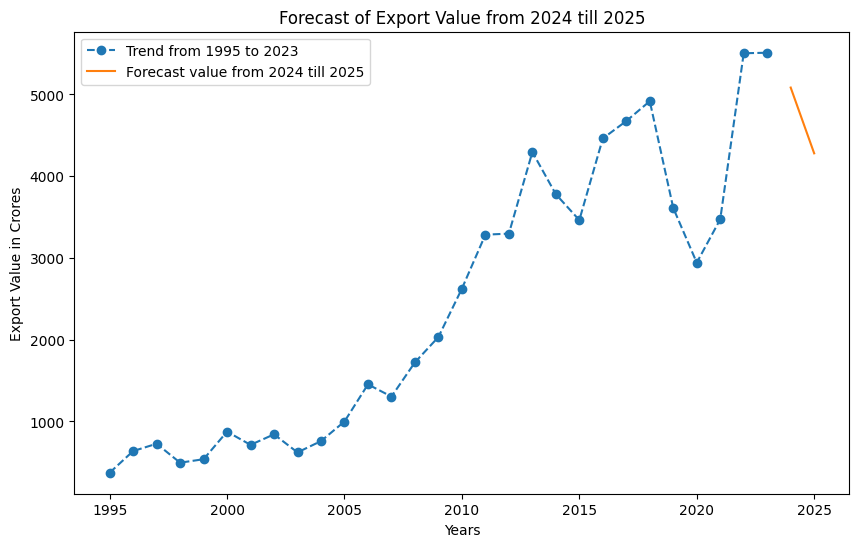

In [41]:
 x=int(input("Enter a year in the range 2025-2030:"))
 item=input("Enter an item:")
 predict(x,item)

Enter a year in the range 2025-2030:2030
Enter an item:Chilled Item
Year 2024 Prediction 1119.5654453361476
Year 2025 Prediction 685.6384601134929
Year 2026 Prediction 779.3316022017859
Year 2027 Prediction 755.2766277194783
Year 2028 Prediction 730.7169202366384
Year 2029 Prediction 706.2793541684317
Year 2030 Prediction 689.7874406523603


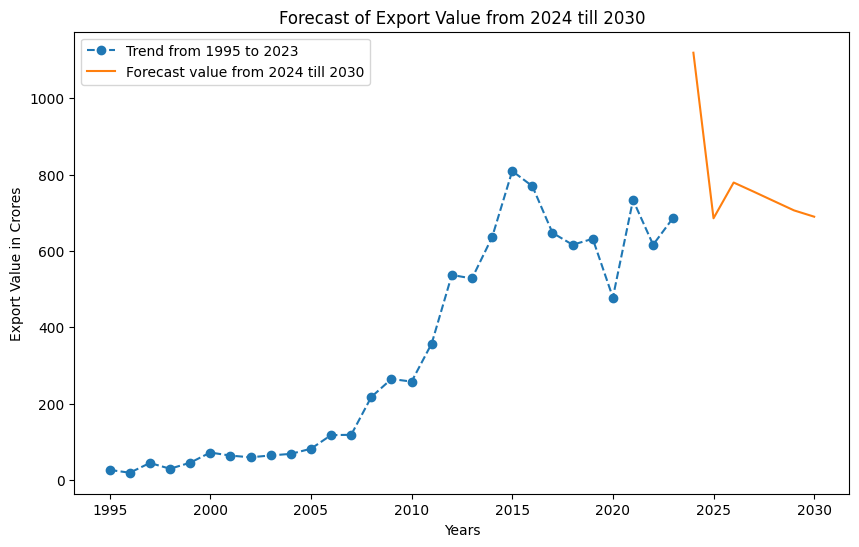

In [42]:
 x=int(input("Enter a year in the range 2025-2030:"))
 item=input("Enter an item:")
 predict(x,item)

In [43]:
 x=int(input("Enter a year in the range 2025-2030:"))
 item=input("Enter an item:")
 predict(x,item)

Enter a year in the range 2025-2030:2027
Enter an item:Cuttle Fish


'Not a Fish. Please provide another input.'